In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Paths to your files
file_path_1 = '/logo2/irfan/Bladder2/Arpit_WGS_batch2_sorted_motifs_4.txt'
file_path_2 = '/logo2/irfan/Bladder2/BWA_output_Arpit_motifs_4.txt'

# Reading the files into pandas DataFrames
df1 = pd.read_csv(file_path_1, sep='\t', index_col=0)
df2 = pd.read_csv(file_path_2, sep='\t', index_col=0)




In [2]:
df1.shape

(256, 175)

In [3]:
df2.shape

(256, 64)

In [4]:
df1.rename(columns=lambda x: x[len('dedup_Aligned_'):], inplace=True)

In [5]:
# Removing the '_sorted_motifs.txt' suffix from column names
#df1 = df1.rename(columns=lambda x: x.replace('_sorted_motifs.txt', ''))
#df2 = df2.rename(columns=lambda x: x.replace('.dup_mk_motifs.txt', ''))

In [6]:
# Get all column names
all_columns = df1.columns

# Identify columns that start with "WBC" or "BC"
wbc_bc_columns = [col for col in all_columns if col.startswith('WBC') or col.startswith('BC')]

# From those, filter to keep only columns that specifically are "UC1"
uc1_columns = [col for col in wbc_bc_columns if "UC1" in col]

# Now, select only the columns you want to keep in the DataFrame
# This includes all columns not starting with "WBC" or "BC", plus the "UC1" columns
final_columns = [col for col in all_columns if col not in wbc_bc_columns] + uc1_columns

# Reassign combined_df to only these columns
df1 = df1[final_columns]



In [7]:
for_healthy_combined_df = pd.merge(df1, df2, left_index=True, right_index=True, how='outer')

Healthy_columns = [col for col in for_healthy_combined_df.columns if not col.startswith(('P', 'W', 'R','B'))]
Healthy_df = for_healthy_combined_df[Healthy_columns]
# Select only the filtered columns in your DataFrame

In [8]:
# Calculate total counts for each sample (column)
total_counts = Healthy_df.sum(axis=0)

# Normalize to Counts Per Million (CPM)
df_cpm = Healthy_df.divide(total_counts, axis=1) * 1e6

display(df_cpm.head())

,NU90_sorted_motifs.txt,NU71_sorted_motifs.txt,NU75_sorted_motifs.txt,NU37_sorted_motifs.txt,NU2_sorted_motifs.txt,NU31_sorted_motifs.txt,NU13_sorted_motifs.txt,NU36_sorted_motifs.txt,NU5_sorted_motifs.txt,Nu21_sorted_motifs.txt,...,NU19R_UC1.dup_mk_motifs.txt,NU68_UC1.dup_mk_motifs.txt,NU71_UC1.dup_mk_motifs.txt,NU32_UC1.dup_mk_motifs.txt,NU18_UC1.dup_mk_motifs.txt,NU75_UC1.dup_mk_motifs.txt,NU36_UC1.dup_mk_motifs.txt,NU19_UC1.dup_mk_motifs.txt,NU16_UC1.dup_mk_motifs.txt,NU70_UC1.dup_mk_motifs.txt
AAAA,15340.647191,14908.765916,16604.517385,14247.422789,15996.431355,15016.047947,15037.368607,13875.087914,15745.502298,13403.583813,...,16279.303309,16189.328619,15320.788184,15307.296076,16137.998256,16536.712268,14277.616109,15841.015904,13174.504640,15533.059024
AAAC,4819.963927,4875.301415,5277.526986,4735.459184,4675.109703,4692.432586,4652.843778,4706.119318,4695.442072,4284.811190,...,4688.235017,4519.277016,4786.096067,4880.113912,5032.391884,5102.577434,4671.727475,4782.825474,4380.985643,4684.934800
AAAG,6152.234164,6355.157195,6807.409282,6289.763426,6212.229545,6090.261491,6136.900937,5975.486206,5900.309290,5503.052011,...,6016.572498,5795.805715,6216.034354,6330.343362,6614.550566,6609.945588,5867.221526,6093.660498,5696.302818,6041.067470
AAAT,8210.737385,8557.052725,9196.031314,8122.759811,8178.323580,8158.561269,8252.565159,8006.015302,7903.998415,7484.793118,...,8069.759432,7909.840311,8317.408985,8311.233526,8997.530110,8851.580350,7798.794854,8287.318771,7202.979328,8076.549516
AACA,5317.730872,5442.432583,5948.693329,5180.784266,5458.318855,5341.987705,5545.707548,5413.223355,5594.512335,4719.276253,...,5483.213772,5415.635855,5348.902706,5334.210484,5447.634895,5876.642044,5370.164980,5411.836604,5105.314467,5219.126359


In [9]:
# Log transformation with a small constant to avoid log(0)
df_log = np.log2(df_cpm + 1)
# Compute Z-scores for the motifs across samples
df_zscore = df_log.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

In [10]:

def get_label(sample_id):
    
    if sample_id.startswith('W') or sample_id.startswith('B'):
        #print(sample_id)
        # if sample_id == 'WBC1096_UC1_x' or sample_id == 'WBC1096_UC1_y':
        #     return sample_id
        return 'Bladder'
    elif sample_id.startswith('R'):
        return 'RCC'
    elif sample_id.startswith('P'):
        return 'Prostate'
    
    else:
        if 'UC1' in sample_id:
            return 'Healthy_batch1'
        else:
            return 'Healthy_new_batches'
        
label_colors = {'Healthy_batch1': 'green','Healthy_new_batches': 'red'} #,  'WBC1096_UC1_x':'violet', 'WBC1096_UC1_y':'orange'}

# Prepare labels for the heatmap and PCA
labels = [get_label(sample_id) for sample_id in df_zscore.columns]

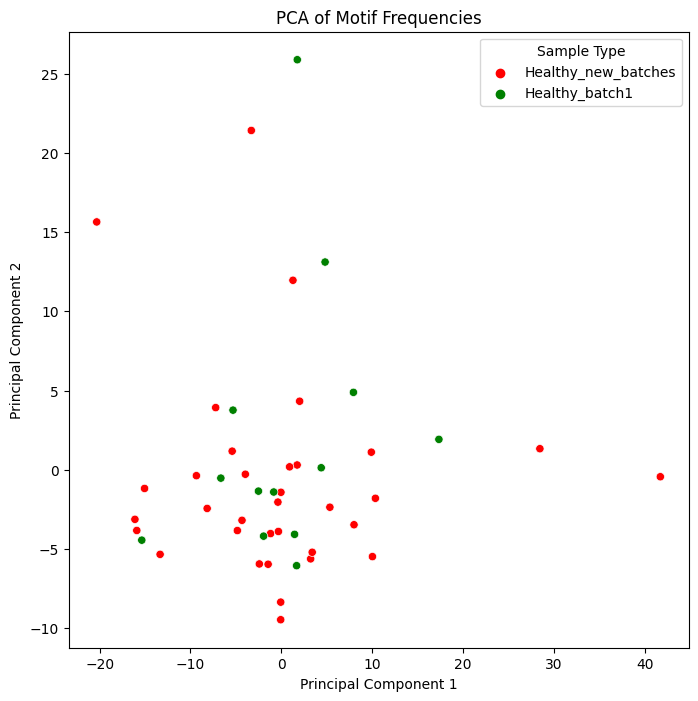

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA model
pca = PCA(n_components=2)  # for 2D projection

# Perform PCA on the Z-score normalized data
pca_result = pca.fit_transform(df_zscore.T)  # transpose to get samples as rows

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# If you have labels for each sample (e.g., healthy or cancer), you can color the points accordingly
# Here's an example if you have a list or array of labels corresponding to the samples order in df_zscore
#labels = np.array(['Healthy' if 'NU' in sample else 'Cancer' for sample in df_zscore.columns])

# Plot the PCA
plt.figure(figsize=(8, 8))
sns.scatterplot(x='PC1', y='PC2', hue=labels, data=pca_df, palette=label_colors)
plt.title('PCA of Motif Frequencies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sample Type')
plt.show()


In [12]:
print(df2.shape)
df2_filtered_columns = [col for col in df2.columns if col.startswith(('P', 'W', 'R', 'B'))]
df2 = df2[df2_filtered_columns]
df2.drop('WBC1096_UC1.dup_mk_motifs.txt', axis=1, inplace=True)
# df1_filtered_columns = [col for col in df1.columns if col.startswith(('P', 'W', 'R', 'B'))]
# df1=df1[df1_filtered_columns]
df2.shape

(256, 64)


(256, 50)

In [13]:
# Combining the DataFrames based on the index
# For an outer join (includes all indices): use how='outer'
# For an inner join (only common indices): use how='inner'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True, how='outer')

# Check for duplicate column names
column_names = combined_df.columns.tolist()  # Convert column names to a list
unique_column_names = set(column_names)  # Convert to a set to get unique column names

# Compare lengths to determine if there are duplicates
if len(column_names) > len(unique_column_names):
    print("There are duplicated column names.")
    duplicates = [name for name in unique_column_names if column_names.count(name) > 1]
    print("Duplicated column names:", duplicates)
else:
    print("No duplicated column names.")

# If you want to save the combined DataFrame to a new file
#combined_df.to_csv('combined_file.tsv', sep='\t')

print(combined_df.shape)

# If you need to work with the combined DataFrame, you can do so directly
# For example, to display the first few rows:
display(combined_df.head())

No duplicated column names.
(256, 201)


,PB-278_UC1_sorted_motifs.txt,PB046_UC1_sorted_motifs.txt,NU90_sorted_motifs.txt,RCC013_UC1_sorted_motifs.txt,NU71_sorted_motifs.txt,PB206_UC1_sorted_motifs.txt,PB-280_UC1_sorted_motifs.txt,PB-276_UC1_sorted_motifs.txt,PB-305_UC1_sorted_motifs.txt,NU75_sorted_motifs.txt,...,WBC1222__UC1.dup_mk_motifs.txt,BC020_UC1.dup_mk_motifs.txt,WBC1196_UC1.dup_mk_motifs.txt,WBC1111_UC1.dup_mk_motifs.txt,WBC1188_UC1.dup_mk_motifs.txt,BC016_UC1.dup_mk_motifs.txt,WBC1309_UC1.dup_mk_motifs.txt,WBC1304_UC1.dup_mk_motifs.txt,WBC1322_UC1.dup_mk_motifs.txt,BC011_UC1.dup_mk_motifs.txt
AAAA,1697863,2047129,2053065,1694213,1874416,1873724,1921580,1652556,1798992,2792628,...,3387457,4008682,4443565,3525488,3312042,5670317,3231885,3880230,7808827,3840687
AAAC,558742,655722,645064,545181,612951,597739,606259,544355,597292,887600,...,764229,1109904,1278700,1011524,950838,1407264,1012539,1127552,2241726,1107479
AAAG,718290,842404,823364,722142,799007,789866,792731,692573,752361,1144903,...,982137,1451558,1638985,1288801,1283328,1895845,1325801,1488290,2918270,1468987
AAAT,1002696,1147014,1098857,917790,1075842,1064783,1089432,962189,978963,1546633,...,1085110,1954151,2228700,1779818,1614284,2389220,1755192,1912909,3622751,1674478
AACA,640921,759313,711681,622732,684254,677695,671315,626294,682286,1000480,...,935029,1242647,1491640,1197716,1126611,1728622,1152911,1377830,2690625,1398048


In [14]:
combined_df.columns.tolist()

['PB-278_UC1_sorted_motifs.txt',
 'PB046_UC1_sorted_motifs.txt',
 'NU90_sorted_motifs.txt',
 'RCC013_UC1_sorted_motifs.txt',
 'NU71_sorted_motifs.txt',
 'PB206_UC1_sorted_motifs.txt',
 'PB-280_UC1_sorted_motifs.txt',
 'PB-276_UC1_sorted_motifs.txt',
 'PB-305_UC1_sorted_motifs.txt',
 'NU75_sorted_motifs.txt',
 'RCC008_UC2_sorted_motifs.txt',
 'NU37_sorted_motifs.txt',
 'PB-397_UC1_sorted_motifs.txt',
 'NU2_sorted_motifs.txt',
 'PB-198_UC1_sorted_motifs.txt',
 'NU31_sorted_motifs.txt',
 'PB056_UC1_sorted_motifs.txt',
 'NU13_sorted_motifs.txt',
 'RCC010_UC2_sorted_motifs.txt',
 'NU36_sorted_motifs.txt',
 'NU5_sorted_motifs.txt',
 'PB-239_UC1_sorted_motifs.txt',
 'PB242_UC1_sorted_motifs.txt',
 'RCC005_UC1_sorted_motifs.txt',
 'Nu21_sorted_motifs.txt',
 'RCC017_UC2_sorted_motifs.txt',
 'NU10_sorted_motifs.txt',
 'NU68_sorted_motifs.txt',
 'PB-162_UC1_sorted_motifs.txt',
 'RCC016_UC1_sorted_motifs.txt',
 'RCC017_UC1_sorted_motifs.txt',
 'RCC003_UC1_sorted_motifs.txt',
 'PB108_UC1_sorted_mot

In [15]:
combined_df.to_csv('compbined.txt',sep='\t')